In [22]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
visits = pd.read_csv('visits_v3.csv')
# Extract some info about the date
visits['Visit_Date'] = pd.to_datetime(visits['Visit_Date'])
visits['Visit_Date_DOW'] = visits['Visit_Date'].dt.day_name()
visits['Visit_Date_Week'] = visits['Visit_Date'].dt.strftime('%U')
visits['Visit_Date_Month'] = visits['Visit_Date'].dt.month_name()
visits['Visit_Date_IsWeekend'] = np.where(visits['Visit_Date'].dt.weekday < 5, 0, 1)
visits['Visit_Date_IsTuesday'] = np.where(visits['Visit_Date'].dt.weekday == 1, 1, 0)


In [24]:
items = pd.read_csv('items_v3.csv', encoding = "ISO-8859-1")

In [25]:
visits_items = pd.read_csv('visit_items_v3.csv', encoding = "ISO-8859-1")

In [26]:
films = pd.read_csv('films_v3.csv', encoding = "ISO-8859-1")

In [27]:
experience_type = pd.read_csv('experience_type_v3.csv', encoding = "ISO-8859-1")

In [28]:
sales_channels = pd.read_csv('sales_channels_v3.csv', encoding = "ISO-8859-1")

In [29]:
timeslice = pd.read_csv('timeslice_v3.csv', encoding = "ISO-8859-1")

In [30]:
locations = pd.read_csv('locations_v3.csv', encoding = "ISO-8859-1")

In [31]:
performance_experience = pd.read_csv('performance_experience_v3.csv')

In [32]:
performance_type = pd.read_csv('performance_type_v3.csv')

In [33]:
seating_experience = pd.read_csv('seating_experience_v3.csv')

In [34]:
visits = visits.merge(films, how="left")
visits = visits.merge(experience_type, how="left")
visits = visits.merge(sales_channels, how="left")
visits = visits.merge(timeslice, left_on="Visit_TimeSlice_ID", right_on="TimeSlice_ID", how="left")
visits = visits.merge(locations, how="left")
visits = visits.merge(performance_experience, how="left")
visits = visits.merge(performance_type, how="left")
visits = visits.merge(seating_experience, how="left")
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36258 entries, 0 to 36257
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Visit_ID                            36258 non-null  int64         
 1   CINEPLEX_D_Membership_ID            36258 non-null  int64         
 2   Visit_Date                          36258 non-null  datetime64[ns]
 3   Visit_TimeSlice_ID                  36258 non-null  int64         
 4   Location_ID                         36258 non-null  int64         
 5   Auditorium_Experience_ID            36258 non-null  int64         
 6   Film_ID                             36258 non-null  int64         
 7   Seating_Experience_ID               36258 non-null  int64         
 8   Sales_Channel_ID                    36258 non-null  int64         
 9   Performance_Experience_ID           36258 non-null  int64         
 10  Performance_Type_ID   

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(visits.head())

,Visit_ID,CINEPLEX_D_Membership_ID,Visit_Date,Visit_TimeSlice_ID,Location_ID,Auditorium_Experience_ID,Film_ID,Seating_Experience_ID,Sales_Channel_ID,Performance_Experience_ID,Performance_Type_ID,Spend,Revenue,Points_Earned,Points_Redeemed,Discount,Has_US_Is_LrgPopcorn,Has_US_Is_Butter,Has_US_Is_Alcohol,Has_US_Is_Candy,Has_US_Is_Coffee,Has_US_Is_Kiddietray,Has_US_Is_Voucher,Has_US_Is_MenuFood,Visit_Date_DOW,Visit_Date_Week,Visit_Date_Month,Visit_Date_IsWeekend,Visit_Date_IsTuesday,Film_Title,Title_ID,Title_Name,Theatrical_Release_Date,Film_Runtime,Language,Market_Language,Release_Pattern,Performance_Type,Is_IMAX,Is_DBOX_Capable,Release_Status,Media_Class_Description,Is_4Dx,Genre_Hierarchy_1,Auditorium_Experience_Description,Is_Premium,Sales_Channel,TimeSlice_ID,TimeSlice_Description,TimeSlice_Start_Time,TimeSlice_End_Time,TimeSlice_Hour_12,TimeSlice_Hour_24,Location_Name,Location_Short_Name,Location_Interactive_Name,Address1,City,Province_CD,Postal_Code,Country_CD,Is_VIP,Is_Outtakes,Is_Licensed_Bar,Is_Licensed_Lounge,Performance_Experience_Description,Performance_Type\t,Seating_Experience_Description
0,2,23777,2019-01-01,15,7253,1,28757,1,8,1,1,15.0,15.0,100,0,1.7,0,0,0,0,0,0,0,0,Tuesday,00,January,0,1,Vice,23956.0,Vice,12/25/2018,133.0,English,English,Wide,Film Presentation,0,0,A,Adult,0.0,Drama,Regular,0,Point of Sale,15,1 - Early Matinee,00:00.0,30:00.0,1:00 PM,13,CPX Eglinton T.C.,Warden&Eglin,Cineplex Odeon Eglinton Town Centre Cinemas,22 Lebovic Avenue,Toronto,ON,M1L 4V9,CA,0,1,1,0,2D,Film Presentation\t,General
1,3,60723,2019-01-01,15,7123,0,0,0,8,0,0,29.6,29.6,297,0,3.3,0,1,0,0,0,0,1,1,Tuesday,00,January,0,1,<None>,0.0,<None>,1/1/1900,0.0,<None>,<None>,<None>,<None>,0,0,B,None,0.0,Unknown,<Unknown>,0,Point of Sale,15,1 - Early Matinee,00:00.0,30:00.0,1:00 PM,13,CPX Winston Churchill VIP,Winston Churchill,Cineplex Cinemas Winston Churchill & VIP,2081 Winston Park Dr.,Oakville,ON,L6H 6P5,CA,1,1,1,0,<Unknown>,<Unknown>\t,<Unknown>
2,4,61080,2019-01-01,15,7290,2,24899,2,8,2,1,28.4,28.4,235,0,3.2,1,1,0,0,0,0,0,0,Tuesday,00,January,0,1,Aquaman,22133.0,Aquaman,12/21/2018,143.0,English,English,Wide,Film Presentation,0,1,A,Adult,0.0,Adaptation,AVX,1,Point of Sale,15,1 - Early Matinee,00:00.0,30:00.0,1:00 PM,13,CPX Hamilton Mountain,CPX Hamilton,Cineplex Cinemas Hamilton Mountain,795 Paramount Drive,Stoney Creek,ON,L8J 0B4,CA,0,1,1,0,3D,Film Presentation\t,Reserved
3,5,103538,2019-01-01,14,1142,1,24977,1,2,1,1,0.0,10.0,0,1000,0.0,0,0,0,0,0,0,0,0,Tuesday,00,January,0,1,Mary Poppins Returns,22187.0,Mary Poppins Returns,12/19/2018,131.0,English,English,Wide,Film Presentation,0,1,A,Family,0.0,Comedy,Regular,0,Kiosk,14,1 - Early Matinee,30:00.0,00:00.0,12:00 PM,12,CPX Pitt Meadows,Meadowtown,Cineplex Odeon Meadowtown Cinemas,"#410, 19800 Lougheed Highway",Pitt Meadows,BC,V3Y 2W1,CA,0,1,0,0,2D,Film Presentation\t,General
4,6,120196,2019-01-01,23,9181,1,29694,1,2,1,1,17.6,17.6,100,0,1.9,0,0,0,0,0,0,0,0,Tuesday,00,January,0,1,DeuxiÂme acte,23976.0,Second Act,12/21/2018,104.0,French,French,Wide,Film Presentation,0,0,A,Adult,0.0,Comedy,Regular,0,Kiosk,23,2 - Late Matinee,00:00.0,30:00.0,5:00 PM,17,CPX Beauport,Beauport,CinÂma Cineplex Odeon Beauport,825 rue ClÂmenceau,Beauport,QC,G1C 2K6,CA,0,0,0,0,2D,Film Presentation\t,General


In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    visits.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit_ID,36258.0,45842.4,35783.6,2.0,20438.2,38439.5,55149.8,141030.0
CINEPLEX_D_Membership_ID,36258.0,5021682.4,2872202.3,3752.0,2585725.0,4953868.5,7502001.0,10451287.0
Visit_TimeSlice_ID,36258.0,25.6,6.4,6.0,21.0,27.0,31.0,48.0
Location_ID,36258.0,5650.4,2646.8,1103.0,3143.0,7199.0,7405.0,9408.0
Auditorium_Experience_ID,36258.0,1.2,1.0,0.0,1.0,1.0,1.0,8.0
Film_ID,36258.0,23632.7,10223.4,0.0,22999.0,27641.0,29919.0,32157.0
Seating_Experience_ID,36258.0,1.2,0.9,0.0,1.0,1.0,1.0,4.0
Sales_Channel_ID,36258.0,7.9,2.8,2.0,8.0,8.0,8.0,12.0
Performance_Experience_ID,36258.0,1.1,0.8,0.0,1.0,1.0,1.0,6.0
Performance_Type_ID,36258.0,1.0,1.2,0.0,1.0,1.0,1.0,16.0


In [37]:
visits['CINEPLEX_D_Membership_ID'].nunique()

6088

In [ ]:
# menu food

In [55]:
# Define my own version of the 'mode' function, which will just return the first mode (in case of tie) and thus avoid an annoying error from groupby (whcih always wants just one value)
my_mode = lambda x: pd.Series.mode(x)[0]

visits_items_menufood = visits[visits["Has_US_Is_MenuFood"] == 1]

members_visits = visits_items_menufood.groupby('CINEPLEX_D_Membership_ID').agg(
    {
        'Visit_Date': ['count'],
        'Visit_Date_DOW': [my_mode],
        'Visit_Date_IsTuesday': ['mean'],
        'Visit_Date_IsWeekend': ['mean'],
        'TimeSlice_Hour_24': ['mean', 'max'],
        
        #'Location_ID': [pd.Series.nunique, my_mode],
        #'City': [pd.Series.nunique, my_mode],
        'Province_CD': [ my_mode],
        
        'Auditorium_Experience_ID': [pd.Series.nunique, my_mode],
        'Seating_Experience_ID': [pd.Series.nunique, my_mode],
        'Sales_Channel_ID': [pd.Series.nunique, my_mode],
        'Performance_Experience_ID': [pd.Series.nunique, my_mode],
        'Performance_Type_ID': [pd.Series.nunique, my_mode],

        #'Film_ID': [pd.Series.nunique, my_mode],
        #'Film_Runtime': ['mean', 'max'],
        'Is_VIP': ['sum', 'mean'],
        'Is_Outtakes': ['sum', 'mean'],
        'Is_Licensed_Bar': ['sum', 'mean'],
        'Is_Licensed_Lounge': ['sum', 'mean'],
        'Language': [my_mode],
        'Genre_Hierarchy_1': [pd.Series.nunique, my_mode],
        
        'Spend': ['mean'],
        'Points_Earned': ['mean'],
        'Points_Redeemed': ['mean'],
        'Discount': ['mean'],
        
        #'Has_US_Is_LrgPopcorn': ['sum', 'mean'],
        #'Has_US_Is_Butter': ['sum', 'mean'],
        #'Has_US_Is_Alcohol': ['sum', 'mean'],
        #'Has_US_Is_Candy': ['sum', 'mean'],
        #'Has_US_Is_Kiddietray': ['sum', 'mean'],
        #'Has_US_Is_Voucher': ['sum', 'mean'],
        #'Has_US_Is_MenuFood': ['sum', 'mean'],
        #'Has_US_Is_Coffee': ['sum', 'mean'],
}).reset_index()
members_visits.columns = ["_".join(x) for x in members_visits.columns.ravel()]
members_visits = members_visits.rename(columns={'CINEPLEX_D_Membership_ID_': "CINEPLEX_D_Membership_ID"})
members_visits.columns = members_visits.columns.str.replace("<lambda_0>", "mode")
members_visits.columns = members_visits.columns.str.replace("<lambda>", "mode")

# Let's sort the members by the ones that have attended the most
members_visits = members_visits.sort_values('Visit_Date_count', ascending=False)

In [57]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(members_visits.head(20))
members_visits.info()

,CINEPLEX_D_Membership_ID,Visit_Date_count,Visit_Date_DOW_mode,Visit_Date_IsTuesday_mean,Visit_Date_IsWeekend_mean,TimeSlice_Hour_24_mean,TimeSlice_Hour_24_max,Province_CD_mode,Auditorium_Experience_ID_nunique,Auditorium_Experience_ID_mode,Seating_Experience_ID_nunique,Seating_Experience_ID_mode,Sales_Channel_ID_nunique,Sales_Channel_ID_mode,Performance_Experience_ID_nunique,Performance_Experience_ID_mode,Performance_Type_ID_nunique,Performance_Type_ID_mode,Is_VIP_sum,Is_VIP_mean,Is_Outtakes_sum,Is_Outtakes_mean,Is_Licensed_Bar_sum,Is_Licensed_Bar_mean,Is_Licensed_Lounge_sum,Is_Licensed_Lounge_mean,Language_mode,Genre_Hierarchy_1_nunique,Genre_Hierarchy_1_mode,Spend_mean,Points_Earned_mean,Points_Redeemed_mean,Discount_mean
650,3321088,43,Sunday,0.0,0.8,16.5,23,AB,4,1,4,1,2,8,4,1,3,1,2,0.0,43,1.0,0,0.0,2,0.0,English,8,Thriller,22.5,379.2,168.6,2.5
169,838197,25,Saturday,0.0,0.6,18.7,20,ON,2,1,2,1,1,8,2,1,1,1,0,0.0,25,1.0,25,1.0,0,0.0,English,8,Action,8.2,162.2,40.0,0.9
1081,5574843,24,Tuesday,0.3,0.2,19.6,22,QC,4,1,4,1,1,8,4,1,2,1,0,0.0,0,0.0,0,0.0,0,0.0,English,6,Adaptation,61.9,481.3,395.8,6.9
438,2337936,18,Sunday,0.0,0.7,13.2,18,ON,2,2,3,1,1,12,2,1,1,1,1,0.1,18,1.0,2,0.1,1,0.1,English,5,Action,33.4,262.8,597.2,3.7
1113,5728040,17,Tuesday,0.5,0.2,17.6,20,ON,2,0,2,0,1,8,3,0,2,0,1,0.1,17,1.0,5,0.3,1,0.1,<None>,6,Unknown,24.8,200.9,205.9,2.8
1747,9060543,16,Friday,0.0,0.3,20.2,22,ON,3,4,2,1,1,12,2,1,1,1,16,1.0,14,0.9,16,1.0,16,1.0,English,7,Adaptation,81.5,680.4,812.5,9.1
1649,8518029,15,Sunday,0.1,0.6,14.3,23,AB,3,4,3,1,1,8,3,1,2,1,15,1.0,15,1.0,13,0.9,2,0.1,English,5,Unknown,72.4,451.1,433.3,8.1
474,2529839,15,Saturday,0.3,0.3,20.2,22,ON,3,1,5,1,2,12,2,1,2,1,9,0.6,14,0.9,15,1.0,1,0.1,Hindi,5,Drama,25.6,188.4,708.3,2.8
1491,7704526,15,Saturday,0.1,0.3,19.1,23,ON,4,0,3,0,1,8,4,0,3,1,1,0.1,14,0.9,2,0.1,1,0.1,English,5,Unknown,42.9,295.3,83.3,4.8
592,3116384,14,Sunday,0.1,0.6,17.7,21,AB,2,0,2,0,1,8,2,0,2,0,12,0.9,14,1.0,0,0.0,12,0.9,<None>,2,Unknown,45.7,279.3,0.0,5.1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 650 to 1942
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CINEPLEX_D_Membership_ID           1943 non-null   int64  
 1   Visit_Date_count                   1943 non-null   int64  
 2   Visit_Date_DOW_mode                1943 non-null   object 
 3   Visit_Date_IsTuesday_mean          1943 non-null   float64
 4   Visit_Date_IsWeekend_mean          1943 non-null   float64
 5   TimeSlice_Hour_24_mean             1943 non-null   float64
 6   TimeSlice_Hour_24_max              1943 non-null   int64  
 7   Province_CD_mode                   1943 non-null   object 
 8   Auditorium_Experience_ID_nunique   1943 non-null   int64  
 9   Auditorium_Experience_ID_mode      1943 non-null   int64  
 10  Seating_Experience_ID_nunique      1943 non-null   int64  
 11  Seating_Experience_ID_mode         1943 non-null   int

In [58]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(members_visits.describe().T)

,count,mean,std,min,25%,50%,75%,max
CINEPLEX_D_Membership_ID,1943.0,5017694.6,2905380.5,5052.0,2563834.0,4924186.0,7564532.0,10365886.0
Visit_Date_count,1943.0,2.1,2.2,1.0,1.0,1.0,2.0,43.0
Visit_Date_IsTuesday_mean,1943.0,0.2,0.3,0.0,0.0,0.0,0.0,1.0
Visit_Date_IsWeekend_mean,1943.0,0.4,0.4,0.0,0.0,0.3,1.0,1.0
TimeSlice_Hour_24_mean,1943.0,17.5,3.7,0.0,16.0,18.0,20.0,23.0
TimeSlice_Hour_24_max,1943.0,18.4,3.8,0.0,17.0,19.0,21.0,23.0
Auditorium_Experience_ID_nunique,1943.0,1.4,0.7,1.0,1.0,1.0,2.0,6.0
Auditorium_Experience_ID_mode,1943.0,1.1,1.2,0.0,0.0,1.0,1.0,8.0
Seating_Experience_ID_nunique,1943.0,1.4,0.6,1.0,1.0,1.0,2.0,5.0
Seating_Experience_ID_mode,1943.0,0.9,0.9,0.0,0.0,1.0,1.0,4.0


# Per-Member Item Stats

In [59]:
visits_items_big = visits_items.merge(items, on="CINEPLEX_Item_ID", how='left')

In [60]:
# Define my own version of the 'mode' function, which will just return the first mode (in case of tie) and thus avoid an annoying error from groupby (whcih always wants just one value)
my_mode = lambda x: pd.Series.mode(x)[0]

members_items = visits_items_big.groupby('CINEPLEX_D_Membership_ID').agg(
    {
        'CINEPLEX_Item_ID': ['count', pd.Series.nunique],
        
        'US_Is_LrgPopcorn': ['sum', 'mean'],
        'US_Is_Butter': ['sum', 'mean'],
        'US_Is_Alcohol': ['sum', 'mean'],
        'US_Is_Candy': ['sum', 'mean'],
        'US_Is_Kiddietray': ['sum', 'mean'],
        'US_Is_Voucher': ['sum', 'mean'],
        'US_Is_MenuFood': ['sum', 'mean'],
        'US_Is_Coffee': ['sum', 'mean'],
        
}).reset_index()

members_items.columns = ["_".join(x) for x in members_items.columns.ravel()]
members_items = members_items.rename(columns={'CINEPLEX_D_Membership_ID_': "CINEPLEX_D_Membership_ID"})
members_items.columns = members_items.columns.str.replace("<lambda_0>", "mode")
members_items.columns = members_items.columns.str.replace("<lambda>", "mode")

# Let's sort the members by the ones that have attended the most
members_items = members_items.sort_values('CINEPLEX_Item_ID_count', ascending=False)

In [61]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(members_items.head(20))

,CINEPLEX_D_Membership_ID,CINEPLEX_Item_ID_count,CINEPLEX_Item_ID_nunique,US_Is_LrgPopcorn_sum,US_Is_LrgPopcorn_mean,US_Is_Butter_sum,US_Is_Butter_mean,US_Is_Alcohol_sum,US_Is_Alcohol_mean,US_Is_Candy_sum,US_Is_Candy_mean,US_Is_Kiddietray_sum,US_Is_Kiddietray_mean,US_Is_Voucher_sum,US_Is_Voucher_mean,US_Is_MenuFood_sum,US_Is_MenuFood_mean,US_Is_Coffee_sum,US_Is_Coffee_mean
3283,5574843,391,37,4,0.0,3,0.0,0,0.0,16,0.0,0,0.0,0,0.0,99,0.3,0,0.0
682,1260480,346,13,0,0.0,0,0.0,0,0.0,5,0.0,0,0.0,0,0.0,3,0.0,0,0.0
5759,9677470,324,39,13,0.0,42,0.1,0,0.0,15,0.0,0,0.0,1,0.0,13,0.0,0,0.0
1756,3175526,311,30,3,0.0,1,0.0,0,0.0,31,0.1,21,0.1,0,0.0,3,0.0,9,0.0
3969,6782143,305,31,28,0.1,1,0.0,1,0.0,19,0.1,0,0.0,10,0.0,11,0.0,0,0.0
1819,3256488,275,63,19,0.1,2,0.0,9,0.0,20,0.1,1,0.0,0,0.0,31,0.1,2,0.0
5021,8518029,254,26,5,0.0,28,0.1,0,0.0,7,0.0,0,0.0,0,0.0,25,0.1,0,0.0
1259,2327754,246,21,24,0.1,37,0.2,0,0.0,2,0.0,0,0.0,0,0.0,8,0.0,0,0.0
2257,3887021,240,19,4,0.0,3,0.0,0,0.0,7,0.0,0,0.0,0,0.0,1,0.0,0,0.0
4420,7536366,235,28,12,0.1,5,0.0,0,0.0,8,0.0,0,0.0,0,0.0,18,0.1,0,0.0


In [62]:
members_all = members_visits.merge(members_items, on='CINEPLEX_D_Membership_ID', how="left")
members_all = pd.get_dummies(members_all)
members_all = members_all.drop('CINEPLEX_D_Membership_ID', axis=1)
col_names = members_all.columns

In [63]:
# Let's write the is dataframe to disk, in case we want to use it in the future
members_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1942
Data columns (total 87 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Visit_Date_count                    1943 non-null   int64  
 1   Visit_Date_IsTuesday_mean           1943 non-null   float64
 2   Visit_Date_IsWeekend_mean           1943 non-null   float64
 3   TimeSlice_Hour_24_mean              1943 non-null   float64
 4   TimeSlice_Hour_24_max               1943 non-null   int64  
 5   Auditorium_Experience_ID_nunique    1943 non-null   int64  
 6   Auditorium_Experience_ID_mode       1943 non-null   int64  
 7   Seating_Experience_ID_nunique       1943 non-null   int64  
 8   Seating_Experience_ID_mode          1943 non-null   int64  
 9   Sales_Channel_ID_nunique            1943 non-null   int64  
 10  Sales_Channel_ID_mode               1943 non-null   int64  
 11  Performance_Experience_ID_nunique   1943 no

In [65]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()
members_all = scaler.fit_transform(members_all)

In [66]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(members_all, method='ward', metric='euclidean')

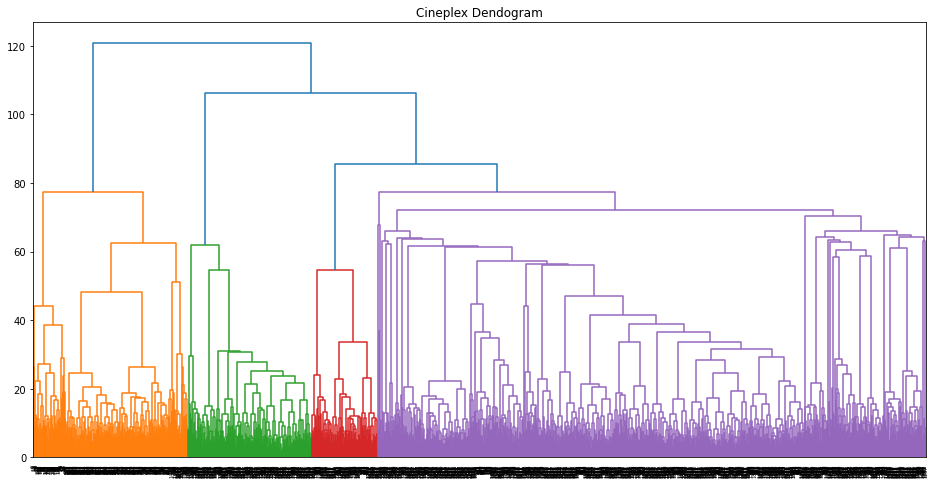

In [67]:
import matplotlib.pyplot as plt

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Cineplex Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [68]:
# Let's find K=5 clusters
K=4
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [69]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, members_all.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = members_all[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
#means


Cluster 1 (n=337):
[  4.43   0.14   0.43  17.85  20.24   2.32   0.72   2.3    0.6    1.33
   8.49   2.21   0.62   1.8    0.59   1.47   0.33   3.93   0.89   2.95
   0.69   1.12   0.26   2.88  41.54 277.59 401.15   4.62  63.7   15.8
   2.84   0.04   4.45   0.05   0.3    0.01   3.32   0.05   0.27   0.
   0.61   0.01   7.69   0.15   0.21   0.     0.31   0.09   0.31   0.15
   0.04   0.09   0.02   0.24   0.15   0.01  -0.    -0.     0.     0.58
  -0.     0.01   0.     0.41  -0.     0.58  -0.     0.     0.     0.
  -0.    -0.     0.33   0.25  -0.     0.11   0.     0.13   0.    -0.
   0.    -0.    -0.    -0.    -0.     0.     0.18]

Cluster 2 (n=269):
[  1.57   0.1    0.44  15.82  16.65   1.06   0.06   1.06   0.02   1.02
   7.99   1.06   0.02   1.05   0.02   0.69   0.41   1.31   0.84   1.07
   0.68   0.62   0.36   1.09  30.77 168.2   43.02   3.42  27.17  10.14
   1.44   0.05   1.9    0.06   0.62   0.03   1.68   0.05   0.07   0.
   0.15   0.01   2.58   0.15   0.1    0.     0.21   0.11   0.25   

In [70]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)



def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(members_all.shape[0]))
d = stats.describe(members_all, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(members_all[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 1943


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,2.09,43.00,4.28,16.24,179.58
Visit_Date_IsTuesday_mean,0.00,0.16,1.00,0.47,0.76,0.85
Visit_Date_IsWeekend_mean,0.00,0.42,1.00,0.84,0.56,-0.25
TimeSlice_Hour_24_mean,0.00,17.49,23.00,21.19,10.14,42.56
TimeSlice_Hour_24_max,0.00,18.43,23.00,22.21,10.04,47.59
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Musical,0.00,0.00,1.00,0.04,1.00,25.23
Genre_Hierarchy_1_mode_Sequel,0.00,0.00,1.00,0.06,1.00,17.69
Genre_Hierarchy_1_mode_Suspense,0.00,0.01,1.00,0.09,0.99,11.78
Genre_Hierarchy_1_mode_Thriller,0.00,0.02,1.00,0.16,0.98,6.12



Cluster 1:
Number of Instances: 337


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,4.43,43.00,9.22,11.44,68.42
Visit_Date_IsTuesday_mean,0.00,0.14,1.00,0.31,0.74,1.27
Visit_Date_IsWeekend_mean,0.00,0.43,1.00,0.66,0.53,0.04
TimeSlice_Hour_24_mean,1.00,17.85,23.00,19.56,13.22,31.25
TimeSlice_Hour_24_max,1.00,20.24,23.00,20.04,9.79,60.29
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Musical,0.00,-0.00,0.00,0.00,0.04,-0.08
Genre_Hierarchy_1_mode_Sequel,0.00,-0.00,0.00,0.00,0.06,-0.11
Genre_Hierarchy_1_mode_Suspense,0.00,-0.00,0.00,0.01,0.09,-0.16
Genre_Hierarchy_1_mode_Thriller,0.00,0.00,1.00,0.04,2.65,47.74



Cluster 2:
Number of Instances: 269


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,1.57,8.00,2.74,8.70,25.28
Visit_Date_IsTuesday_mean,0.00,0.10,1.00,0.40,0.99,1.90
Visit_Date_IsWeekend_mean,0.00,0.44,1.00,0.91,0.53,-0.33
TimeSlice_Hour_24_mean,0.00,15.82,23.00,28.74,11.96,22.05
TimeSlice_Hour_24_max,0.00,16.65,23.00,29.69,11.99,25.11
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Musical,0.00,-0.00,0.00,0.00,0.04,-0.08
Genre_Hierarchy_1_mode_Sequel,0.00,-0.00,0.00,0.00,0.06,-0.11
Genre_Hierarchy_1_mode_Suspense,0.00,-0.00,0.00,0.01,0.09,-0.16
Genre_Hierarchy_1_mode_Thriller,0.00,0.00,0.00,0.02,-0.12,-0.27



Cluster 3:
Number of Instances: 144


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,1.78,6.00,2.74,5.81,7.52
Visit_Date_IsTuesday_mean,0.00,0.23,1.00,0.61,0.57,0.16
Visit_Date_IsWeekend_mean,0.00,0.35,1.00,0.84,0.70,-0.13
TimeSlice_Hour_24_mean,12.00,17.32,22.00,19.27,16.00,15.30
TimeSlice_Hour_24_max,12.00,17.97,23.00,20.32,16.31,17.46
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Musical,0.00,-0.00,0.00,0.00,0.04,-0.08
Genre_Hierarchy_1_mode_Sequel,0.00,0.00,0.00,0.00,-0.05,-0.11
Genre_Hierarchy_1_mode_Suspense,0.00,0.00,0.00,0.01,-0.07,-0.16
Genre_Hierarchy_1_mode_Thriller,0.00,0.00,0.00,0.02,-0.12,-0.27



Cluster 4:
Number of Instances: 1193


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,1.58,9.00,2.56,7.57,20.24
Visit_Date_IsTuesday_mean,0.00,0.17,1.00,0.52,0.72,0.65
Visit_Date_IsWeekend_mean,0.00,0.42,1.00,0.88,0.56,-0.29
TimeSlice_Hour_24_mean,0.00,17.79,23.00,19.98,13.79,27.50
TimeSlice_Hour_24_max,0.00,18.37,23.00,20.93,14.01,30.20
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Musical,0.00,0.00,1.00,0.07,0.78,15.42
Genre_Hierarchy_1_mode_Sequel,0.00,0.01,1.00,0.09,0.78,10.76
Genre_Hierarchy_1_mode_Suspense,0.00,0.01,1.00,0.14,0.77,7.08
Genre_Hierarchy_1_mode_Thriller,0.00,0.03,1.00,0.25,0.77,3.59


In [71]:
# Or, we could have used panda's group-by function
import pandas as pd

X_df = pd.DataFrame(scaler.inverse_transform(members_all), columns=col_names)
X_df['cluster'] = labels


cl_group = X_df.groupby(['cluster']).agg('describe')
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(cl_group)


Visit_Date_count                                \
                   count mean std min 25% 50% 75%  max   
cluster                                                  
1                  337.0  4.4 3.9 1.0 2.0 3.0 5.0 43.0   
2                  269.0  1.6 1.2 1.0 1.0 1.0 2.0  8.0   
3                  144.0  1.8 1.2 1.0 1.0 1.0 2.0  6.0   
4                 1193.0  1.6 1.0 1.0 1.0 1.0 2.0  9.0   

        Visit_Date_IsTuesday_mean                               \
                            count mean std min 25% 50% 75% max   
cluster                                                          
1                           337.0  0.1 0.2 0.0 0.0 0.0 0.2 1.0   
2                           269.0  0.1 0.3 0.0 0.0 0.0 0.0 1.0   
3                           144.0  0.2 0.4 0.0 0.0 0.0 0.4 1.0   
4                          1193.0  0.2 0.3 0.0 0.0 0.0 0.0 1.0   

        Visit_Date_IsWeekend_mean                               \
                            count mean std min 25% 50% 75% max   
cluster                                                          
1                           337.0  0.4 0.3 0.0 0.2 0.5 0.7 1.0   
2                           269.0  0.4 0.5 0.0 0.0 0.3 1.0 1.0   
3                           144.0  0.3 0.4 0.0 0.0 0.0 0.8 1.0   
4                          1193.0  0.4 0.4 0.0 0.0 0.3 1.0 1.0   

        TimeSlice_Hour_24_mean                                    \
                         count mean std  min  25%  50%  75%  max   
cluster                                                            
1                        337.0 17.8 2.8  1.0 16.2 18.3 19.6 23.0   
2                        269.0 15.8 6.4  0.0 14.8 18.0 20.0 23.0   
3                        144.0 17.3 2.6 12.0 15.5 18.0 19.0 22.0   
4                       1193.0 17.8 3.0  0.0 16.0 18.0 20.0 23.0   

        TimeSlice_Hour_24_max                                    \
                        count mean std  min  25%  50%  75%  max   
cluster                                                           
1                       337.0 20.2 2.5  1.0 19.0 21.0 22.0 23.0   
2                       269.0 16.6 6.5  0.0 16.0 19.0 21.0 23.0   
3                       144.0 18.0 2.7 12.0 16.0 18.0 20.0 23.0   
4                      1193.0 18.4 3.1  0.0 17.0 19.0 21.0 23.0   

        Auditorium_Experience_ID_nunique                               \
                                   count mean std min 25% 50% 75% max   
cluster                                                                 
1                                  337.0  2.3 0.8 1.0 2.0 2.0 3.0 6.0   
2                                  269.0  1.1 0.2 1.0 1.0 1.0 1.0 3.0   
3                                  144.0  1.2 0.5 1.0 1.0 1.0 1.0 3.0   
4                                 1193.0  1.2 0.4 1.0 1.0 1.0 1.0 4.0   

        Auditorium_Experience_ID_mode                               \
                                count mean std min 25% 50% 75% max   
cluster                                                              
1                               337.0  0.7 1.0 0.0 0.0 0.0 1.0 4.0   
2                               269.0  0.1 0.4 0.0 0.0 0.0 0.0 4.0   
3                               144.0  1.1 1.0 0.0 1.0 1.0 1.0 4.0   
4                              1193.0  1.5 1.2 0.0 1.0 1.0 2.0 8.0   

        Seating_Experience_ID_nunique                               \
                                count mean std min 25% 50% 75% max   
cluster                                                              
1                               337.0  2.3 0.7 1.0 2.0 2.0 3.0 5.0   
2                               269.0  1.1 0.3 1.0 1.0 1.0 1.0 3.0   
3                               144.0  1.3 0.6 1.0 1.0 1.0 1.0 4.0   
4                              1193.0  1.2 0.4 1.0 1.0 1.0 1.0 3.0   

        Seating_Experience_ID_mode                               \
                             count mean std min 25% 50% 75% max   
cluster                                                           
1                            337.

In [73]:
cl_group.to_csv('C:\\Users\\yangj\\Desktop\\MMA study\\MMA869 Machine Learning and AI\\team project\\clustering\\summary_table.csv', index=False)